In [1]:
from pandas import*
import pandas
import matplotlib as mpl
import numpy as np

import sys
reload(sys) 
sys.setdefaultencoding('utf8')
sys.getdefaultencoding()

%matplotlib inline

In [2]:
import locale
locale.getpreferredencoding()

'UTF-8'

In [3]:
names = read_csv('baby-names2.csv')
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [4]:
names[names.name == 'Kent'].head()

,year,name,prop,sex,soundex
11806,1891,Kent,0.000064,boy,K530
13799,1893,Kent,0.000066,boy,K530
23962,1903,Kent,0.000054,boy,K530
28917,1908,Kent,0.000060,boy,K530
29819,1909,Kent,0.000074,boy,K530


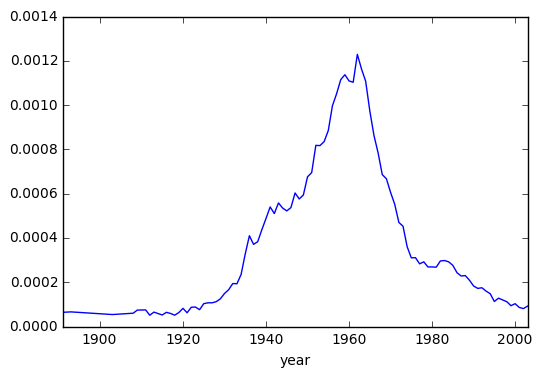

In [5]:
name_kent_prop = names.set_index(['name','year'])
name_kent_prop.ix['Kent']['prop'].plot()

In [10]:
s = Series([1,2,3,4,56], index=['a', 'b', 'c', 'd', 'e'])
s.index

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')

In [11]:
names.get_value(1:10, 'name')

SyntaxError: invalid syntax (<ipython-input-11-7f2f34c59337>, line 1)

In [88]:
names.ix[(names.year > 1880) & (names.year < 1900), ['year', 'name']].head()

,year,name
1000,1881,John
1001,1881,William
1002,1881,James
1003,1881,George
1004,1881,Charles


In [18]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               index=['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04', '2001-01-05', '2001-01-06'])
df

,a,b,c
2001-01-01,2.443041,foo,1.359122
2001-01-02,1.619868,bar,-1.324221
2001-01-03,-0.839786,foo,0.081590
2001-01-04,0.020349,bar,-0.359353
2001-01-05,-0.607006,foo,-0.015606
2001-01-06,0.178601,bar,-0.522408


In [19]:
df.index

Index([u'2001-01-01', u'2001-01-02', u'2001-01-03', u'2001-01-04',
       u'2001-01-05', u'2001-01-06'],
      dtype='object')

In [22]:
df.columns

Index([u'a', u'b', u'c'], dtype='object')

In [23]:
df.index.name = "date"
df

,a,b,c
date,,,
2001-01-01,2.443041,foo,1.359122
2001-01-02,1.619868,bar,-1.324221
2001-01-03,-0.839786,foo,0.081590
2001-01-04,0.020349,bar,-0.359353
2001-01-05,-0.607006,foo,-0.015606
2001-01-06,0.178601,bar,-0.522408


In [26]:
df.ix['2001-01-01':'2001-01-03']

,a,b,c
date,,,
2001-01-01,2.443041,foo,1.359122
2001-01-02,1.619868,bar,-1.324221
2001-01-03,-0.839786,foo,0.081590


In [32]:
df

,a,c
date,,
2001-01-01,2.443041,1.359122
2001-01-02,1.619868,-1.324221
2001-01-03,-0.839786,0.081590
2001-01-04,0.020349,-0.359353
2001-01-05,-0.607006,-0.015606
2001-01-06,0.178601,-0.522408


In [33]:
df.apply(np.sqrt)

,a,c
date,,
2001-01-01,1.563023,1.165814
2001-01-02,1.272740,NaN
2001-01-03,NaN,0.285639
2001-01-04,0.142652,NaN
2001-01-05,NaN,NaN
2001-01-06,0.422612,NaN


#### apply的用法，作用于DataFrame按照axis的值，0：往apply函数传入一列，1：往apply函数传入一行；
#### 作用于Series时，往apply函数里面传入一个Series的元素

In [64]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               index=['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04', '2001-01-05', '2001-01-06'])

In [79]:
def get_favor(group):
    a = group.a
    b = group.b
    if a > 1:
        return a
    else:
        return b
    
def get_favor_col(group):
    return sum(group)

def get_favor_s(n):
    return type(n)

In [66]:
df

,a,b,c
2001-01-01,-2.018512,foo,-1.499166
2001-01-02,-0.815660,bar,-0.505419
2001-01-03,-1.144341,foo,0.123415
2001-01-04,1.128768,bar,1.418112
2001-01-05,-0.911736,foo,-0.262926
2001-01-06,1.059380,bar,0.155207


In [75]:
df.apply(get_favor, axis=1)

2001-01-01        foo
2001-01-02        bar
2001-01-03        foo
2001-01-04    1.12877
2001-01-05        foo
2001-01-06    1.05938
dtype: object

In [81]:
df[['a','c']].apply(get_favor_col, axis=0)

a   -2.702101
c   -0.570777
dtype: float64

In [77]:
df['a'].apply(get_favor_s)

2001-01-01    <type 'float'>
2001-01-02    <type 'float'>
2001-01-03    <type 'float'>
2001-01-04    <type 'float'>
2001-01-05    <type 'float'>
2001-01-06    <type 'float'>
Name: a, dtype: object

In [84]:
df.append(df[['a','c']].apply(get_favor_col, axis=0), ignore_index=True)

,a,b,c
0,-2.018512,foo,-1.499166
1,-0.815660,bar,-0.505419
2,-1.144341,foo,0.123415
3,1.128768,bar,1.418112
4,-0.911736,foo,-0.262926
5,1.059380,bar,0.155207
6,-2.702101,NaN,-0.570777


#### 灵活的过滤、匹配方法，适当时候需要配合apply的使用

In [86]:
df['b'].str.startswith('f')

2001-01-01     True
2001-01-02    False
2001-01-03     True
2001-01-04    False
2001-01-05     True
2001-01-06    False
Name: b, dtype: bool

In [90]:
df[df.b.str.startswith('f')][df.c > 0]['a']

2001-01-03   -1.144341
Name: a, dtype: float64

In [91]:
def my_filer(e):
    return e.startswith('f')


In [92]:
df[df.b.apply(my_filer)][df.c > 0]['a']

2001-01-03   -1.144341
Name: a, dtype: float64

In [93]:
df

,a,b,c
2001-01-01,-2.018512,foo,-1.499166
2001-01-02,-0.815660,bar,-0.505419
2001-01-03,-1.144341,foo,0.123415
2001-01-04,1.128768,bar,1.418112
2001-01-05,-0.911736,foo,-0.262926
2001-01-06,1.059380,bar,0.155207


In [98]:
df2 = DataFrame({
    "bb":['foo','bar'],
    "d":[0, 1]
})
df2

,bb,d
0,foo,0
1,bar,1


#### merge的用法，left_on， right_on 指定链接的字段，index指定是否保留index（最左侧的index）

In [109]:
merge(left=df, right=df2, left_on='b', right_on='bb', left_index=True, right_index=False, how='left', suffixes=['a','b'])

,a,b,c,bb,d
0,-2.018512,foo,-1.499166,foo,0
1,-0.815660,bar,-0.505419,bar,1
0,-1.144341,foo,0.123415,foo,0
1,1.128768,bar,1.418112,bar,1
0,-0.911736,foo,-0.262926,foo,0
1,1.059380,bar,0.155207,bar,1


In [1]:
import os

in_files = []
for l in os.listdir('/Users/fangfeiguo/Desktop/landsat8/'):
    if l == '.DS_Store':
        continue
    for file in os.listdir('/Users/fangfeiguo/Desktop/landsat8/' + l):
        if file.endswith('.dat'):
            in_files.append('/Users/fangfeiguo/Desktop/landsat8/' + l + '/' + file)

In [2]:
in_files

['/Users/fangfeiguo/Desktop/landsat8/20130426/20130426sub1.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20130512/20130512sub1.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20130528/20130528sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20130613/20130613sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20130816/20130816sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20130901/20130901sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20131003/20131003sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20131019/20131019sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20131104/20131104sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20131120/20131120sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20131206/20131206sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20131222/20131222sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/subset1/subset5.dat']

In [3]:
['/Users/fangfeiguo/Desktop/landsat8/' + l + '/' + file for file in [l for l in os.listdir('/Users/fangfeiguo/Desktop/landsat8/') if l != '.DS_Store'] if file.endswith('.dat')]

[]

In [5]:
base = '/Users/fangfeiguo/Desktop/landsat8/'
[base + l + '/' + file for l in os.listdir(base) if l != '.DS_Store' for file in os.listdir(base + l) if file.endswith('.dat')]

['/Users/fangfeiguo/Desktop/landsat8/20130426/20130426sub1.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20130512/20130512sub1.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20130528/20130528sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20130613/20130613sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20130816/20130816sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20130901/20130901sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20131003/20131003sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20131019/20131019sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20131104/20131104sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20131120/20131120sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20131206/20131206sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/20131222/20131222sub.dat',
 '/Users/fangfeiguo/Desktop/landsat8/subset1/subset5.dat']

In [10]:
def in_range(num, min_num, max_num):
    return max_num if num > max_num else (min_num if num < min_num else num)
in_range(1.5,1,2)

1.5